<a href="https://colab.research.google.com/github/maureenmaklik/Histogram_Equalization_final/blob/main/ADF_with_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ADF Test: Checking Stationarity in Economics**
**Understanding Stationarity**
Before diving into the ADF test, it's crucial to grasp the concept of stationarity. A time series is considered stationary if its statistical properties (mean, variance, autocorrelation) remain constant over time. This means that the data doesn't exhibit trends or seasonal patterns. Stationarity is a fundamental assumption for many time series models, as it ensures reliable forecasts and inferences.

**The ADF Test**
The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series has a unit root, which is indicative of non-stationarity.

**Null Hypothesis:** The time series contains a unit root (non-stationary).
Alternative Hypothesis: The time series is stationary.

Steps involved in the ADF test:

**Specify the model:** The ADF test includes different model specifications to account for various time series patterns. The most common ones are:

Model with constant and trend: Includes a constant and a time trend.
Model with constant: Includes a constant but no time trend.
Model without constant and trend: Neither a constant nor a time trend is included.
Calculate the test statistic: The ADF test statistic is calculated based on the estimated coefficients of the specified model.

Compare the test statistic with critical values: The calculated test statistic is compared with the critical values at different significance levels.

**Decision:**

If the test statistic is less than the critical value, reject the null hypothesis and conclude that the time series is stationary.
If the test statistic is greater than or equal to the critical value, fail to reject the null hypothesis, indicating the time series might be non-stationary.
**Importance of Stationarity**
Stationarity is essential in time series analysis for several reasons:

Model building: Many time series models, such as ARIMA, require stationarity.
Forecasting: Accurate forecasts can only be made for stationary time series.
Hypothesis testing: Statistical tests assume stationarity to produce reliable results.
Additional Considerations
P-value: In addition to comparing the test statistic with critical values, the p-value can also be used to make a decision. A low p-value (typically less than 0.05) indicates strong evidence against the null hypothesis, suggesting stationarity.
Other tests: While the ADF test is widely used, other tests like the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test can also be employed to check stationarity.
Differencing: If a time series is found to be non-stationary, differencing (taking the difference between consecutive observations) can often induce stationarity.
By understanding the ADF test and its implications, you can effectively assess the stationarity of economic time series and apply appropriate statistical techniques.

In [1]:
pip install statsmodels arch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 15.2 MB/s eta 0:00:00


In [2]:
pip install pandas statsmodels arch openpyxl


In [4]:
pip install --upgrade arch


In [13]:
import pandas as pd
import statsmodels.tsa.stattools as adf

# Load the Excel file
df = pd.read_excel('/content/500in1.xlsx', sheet_name='Sheet1')

# Set 'Date' as the index if you need it for time series analysis
df.set_index('Date', inplace=True)

# Extract the 'PE' column for analysis
series = df['PE']

# ADF Test Function
def adf_test(series):
    result = adf.adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value {}: {}'.format(key, value))

# Apply the ADF Test
print("ADF Test Results:")
adf_test(series)


ADF Test Results:
ADF Statistic: -3.6420629349724503
p-value: 0.005005961113891285
Critical Value 1%: -3.4548957220044336
Critical Value 5%: -2.8723451788613157
Critical Value 10%: -2.572527778361272


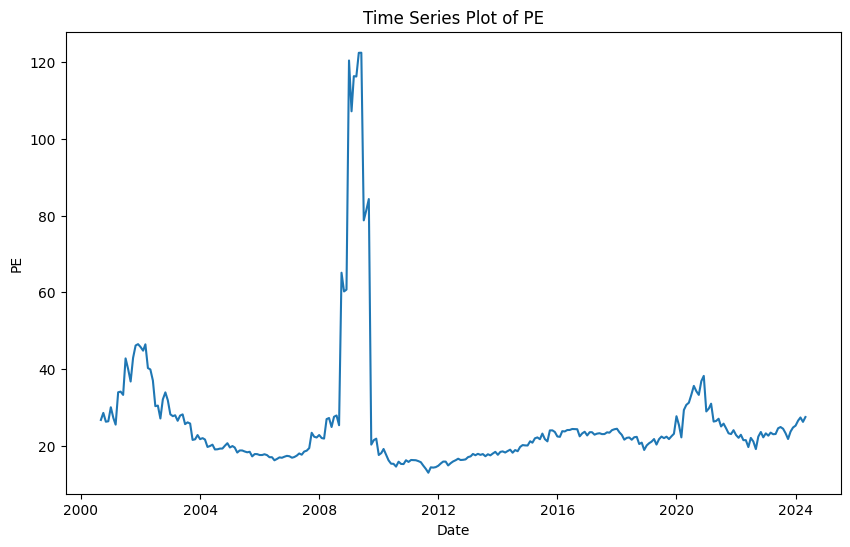

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('/content/500in1.xlsx', sheet_name='Sheet1')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(df['PE'])
plt.title('Time Series Plot of PE')
plt.xlabel('Date')
plt.ylabel('PE')
plt.show()


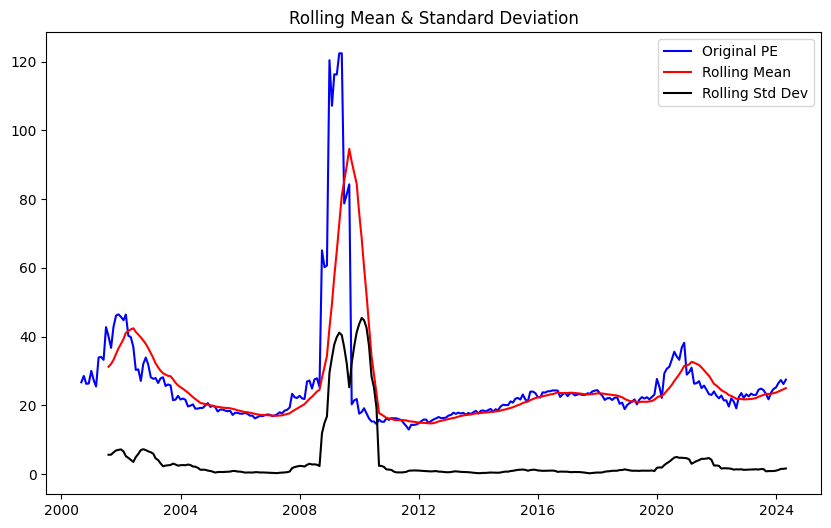

In [16]:
# Calculate rolling statistics
rolling_mean = df['PE'].rolling(window=12).mean()
rolling_std = df['PE'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(df['PE'], color='blue', label='Original PE')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std Dev')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show()


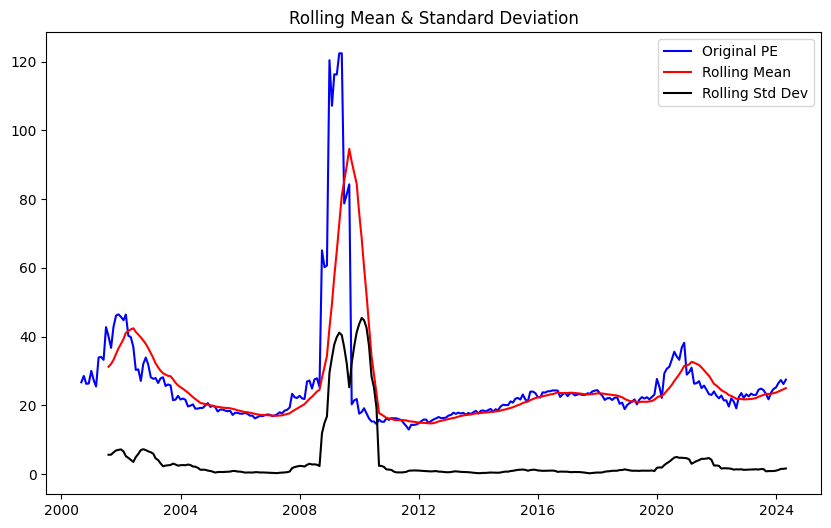

In [17]:
# Calculate rolling statistics
rolling_mean = df['PE'].rolling(window=12).mean()
rolling_std = df['PE'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(df['PE'], color='blue', label='Original PE')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std Dev')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show()


<Figure size 1000x600 with 0 Axes>

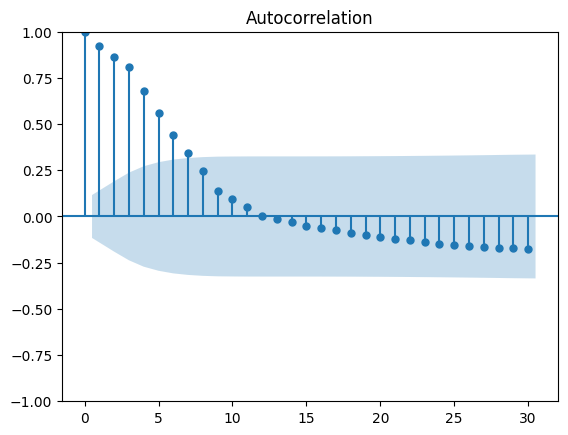

<Figure size 1000x600 with 0 Axes>

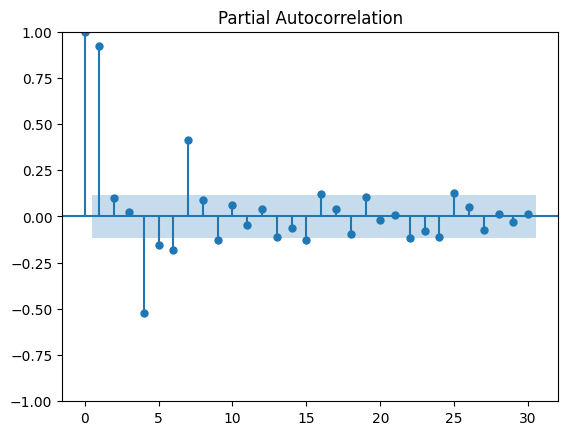

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF Plot
plt.figure(figsize=(10, 6))
plot_acf(df['PE'], lags=30)
plt.show()

# PACF Plot
plt.figure(figsize=(10, 6))
plot_pacf(df['PE'], lags=30)
plt.show()


# Yes, you can visualize the results of the ADF test and other related aspects of your time series data through various plots. Here are a few common **visualizations that might be helpful:**

**1. Time Series Plot**
This plot shows the "PE" values over time, which can give you a visual sense of trends, seasonality, or any potential stationarity.

**2. Rolling Mean and Standard Deviation Plot**
This plot helps visualize how the mean and standard deviation of the series change over time, which is relevant to checking stationarity.

**3. ADF Test Statistic Plot**
While the ADF test itself is a statistical test, you can plot the test statistic against the critical values to visually inspect if the series is stationary.

**4. Autocorrelation and Partial Autocorrelation Plots (ACF & PACF)**
These plots help identify the autocorrelation within the series, which can give insight into how values are related over time.

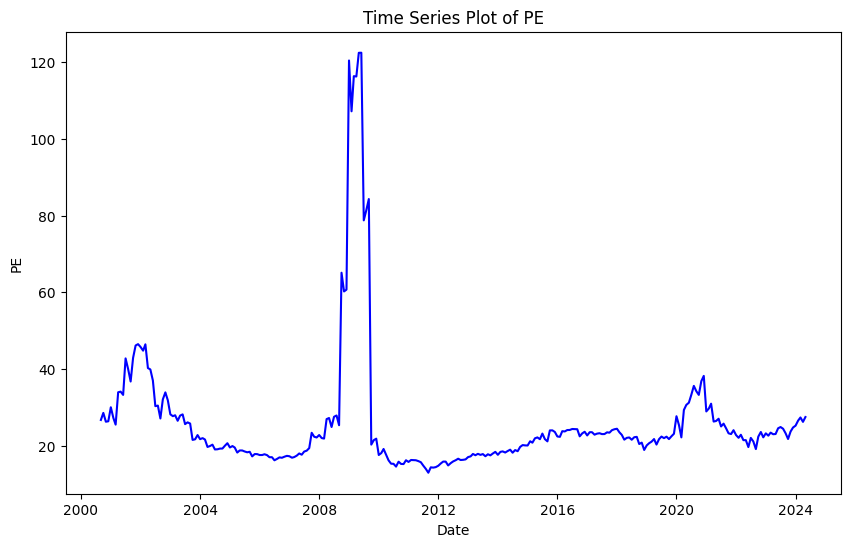

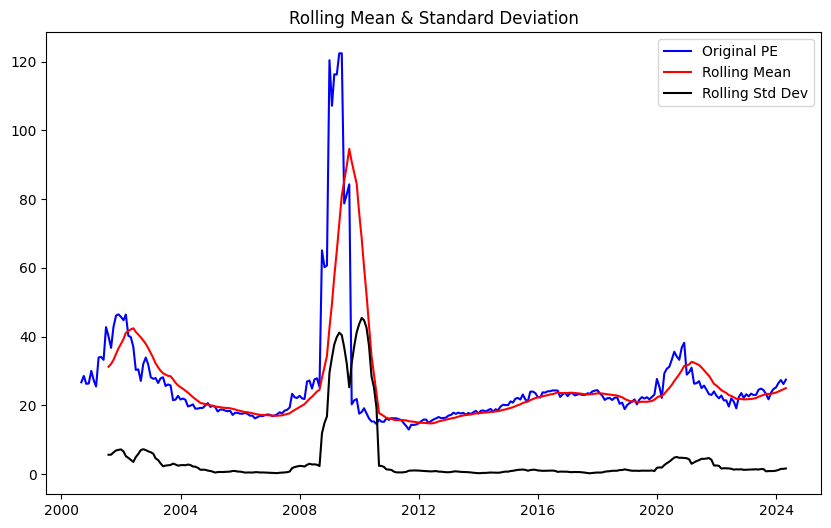

ADF Test Results:


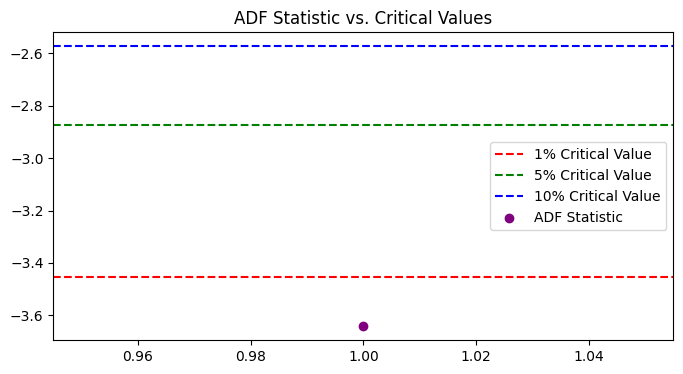

ADF Statistic: -3.6420629349724503
p-value: 0.005005961113891285
Critical Value 1%: -3.4548957220044336
Critical Value 5%: -2.8723451788613157
Critical Value 10%: -2.572527778361272


<Figure size 1000x600 with 0 Axes>

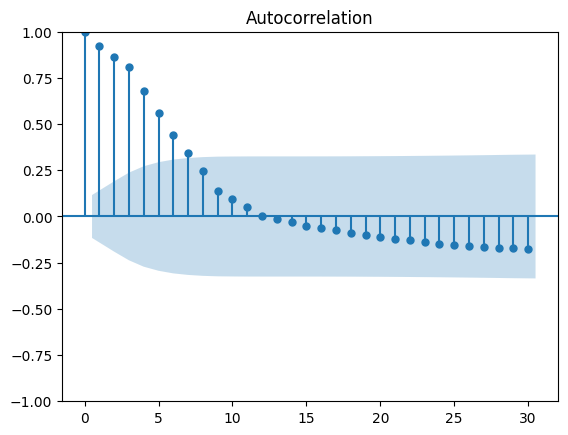

<Figure size 1000x600 with 0 Axes>

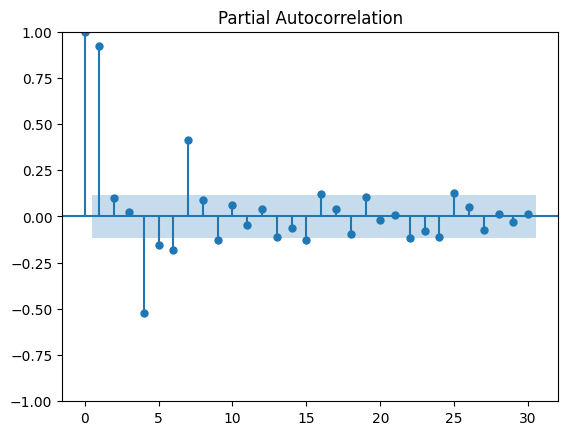

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as adf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the Excel file
df = pd.read_excel('/content/500in1.xlsx', sheet_name='Sheet1')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Extract the 'PE' column for analysis
series = df['PE']

# Step 1: Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(series, color='blue')
plt.title('Time Series Plot of PE')
plt.xlabel('Date')
plt.ylabel('PE')
plt.show()

# Step 2: Rolling Mean and Standard Deviation Plot
rolling_mean = series.rolling(window=12).mean()
rolling_std = series.rolling(window=12).std()

plt.figure(figsize=(10, 6))
plt.plot(series, color='blue', label='Original PE')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std Dev')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show()

# Step 3: ADF Test with Statistic Plot
def adf_test_with_plot(series):
    result = adf.adfuller(series)
    adf_stat = result[0]
    critical_values = result[4]

    # Plotting the ADF statistic against the critical values
    plt.figure(figsize=(8, 4))
    plt.axhline(y=critical_values['1%'], color='r', linestyle='--', label='1% Critical Value')
    plt.axhline(y=critical_values['5%'], color='g', linestyle='--', label='5% Critical Value')
    plt.axhline(y=critical_values['10%'], color='b', linestyle='--', label='10% Critical Value')
    plt.scatter(1, adf_stat, color='purple', label='ADF Statistic')
    plt.title('ADF Statistic vs. Critical Values')
    plt.legend(loc='best')
    plt.show()

    # Print ADF test results
    print('ADF Statistic:', adf_stat)
    print('p-value:', result[1])
    for key, value in critical_values.items():
        print('Critical Value {}: {}'.format(key, value))

# Apply the ADF Test with plot
print("ADF Test Results:")
adf_test_with_plot(series)

# Step 4: ACF and PACF Plots
plt.figure(figsize=(10, 6))
plot_acf(series, lags=30)
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(series, lags=30)
plt.show()


ADF Statistic: -3.6420629349724503
p-value: 0.005005961113891285
Critical Value 1%: -3.4548957220044336
Critical Value 5%: -2.8723451788613157
Critical Value 10%: -2.572527778361272


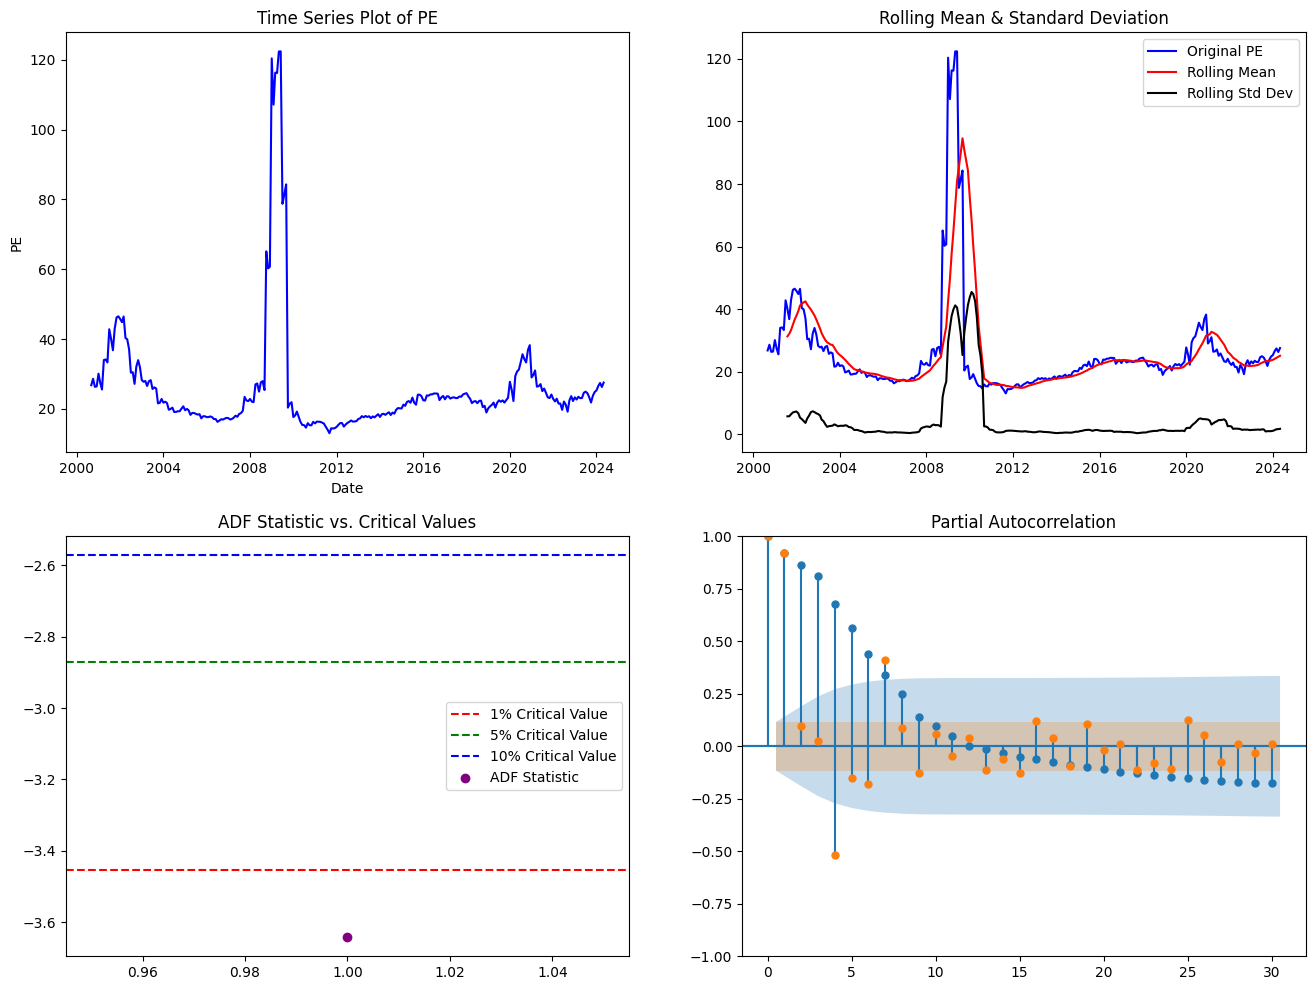

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as adf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the Excel file
df = pd.read_excel('/content/500in1.xlsx', sheet_name='Sheet1')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Extract the 'PE' column for analysis
series = df['PE']

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Step 1: Time Series Plot
axs[0, 0].plot(series, color='blue')
axs[0, 0].set_title('Time Series Plot of PE')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('PE')

# Step 2: Rolling Mean and Standard Deviation Plot
rolling_mean = series.rolling(window=12).mean()
rolling_std = series.rolling(window=12).std()
axs[0, 1].plot(series, color='blue', label='Original PE')
axs[0, 1].plot(rolling_mean, color='red', label='Rolling Mean')
axs[0, 1].plot(rolling_std, color='black', label='Rolling Std Dev')
axs[0, 1].set_title('Rolling Mean & Standard Deviation')
axs[0, 1].legend(loc='best')

# Step 3: ADF Test with Statistic Plot
def adf_test_with_plot(series, ax):
    result = adf.adfuller(series)
    adf_stat = result[0]
    critical_values = result[4]

    # Plotting the ADF statistic against the critical values
    ax.axhline(y=critical_values['1%'], color='r', linestyle='--', label='1% Critical Value')
    ax.axhline(y=critical_values['5%'], color='g', linestyle='--', label='5% Critical Value')
    ax.axhline(y=critical_values['10%'], color='b', linestyle='--', label='10% Critical Value')
    ax.scatter(1, adf_stat, color='purple', label='ADF Statistic')
    ax.set_title('ADF Statistic vs. Critical Values')
    ax.legend(loc='best')

    # Print ADF test results
    print('ADF Statistic:', adf_stat)
    print('p-value:', result[1])
    for key, value in critical_values.items():
        print('Critical Value {}: {}'.format(key, value))

# Apply the ADF Test with plot
adf_test_with_plot(series, axs[1, 0])

# Step 4: ACF and PACF Plots
axs[1, 1].set_title('ACF and PACF Plots')
fig_acf = plt.figure(figsize=(10, 6))
plot_acf(series, lags=30, ax=axs[1, 1])
fig_pacf = plt.figure(figsize=(10, 6))
plot_pacf(series, lags=30, ax=axs[1, 1])

plt.tight_layout()
plt.show()


# **Interpreting the Time Series Plot and Analysis**
**Overview:**

The image presents a comprehensive analysis of a time series, likely representing a Price-to-Earnings (PE) ratio over time. It includes four key components:

**Time Series Plot: Visualizes the raw PE data over time.**
Rolling Mean & Standard Deviation: Shows the moving average and standard deviation of the PE data, helping to identify trends and volatility.
ADF Statistic vs. Critical Values: Displays the results of the Augmented Dickey-Fuller (ADF) test for stationarity.
Partial Autocorrelation: Plots the correlation between the time series and its lagged values, helping identify potential patterns.

**Interpretation:**

**Time Series Plot:**

The PE ratio exhibits significant fluctuations over the period.
There appears to be a general upward trend, especially in recent years.
There are periods of high volatility, indicated by sharp peaks and troughs.
Rolling Mean & Standard Deviation:
The rolling mean generally follows the upward trend of the original series, but with less volatility.
The rolling standard deviation shows periods of increased and decreased volatility.

**ADF Statistic vs. Critical Values:**
The ADF statistic is above all critical values (1%, 5%, and 10%).
This suggests that we fail to reject the null hypothesis of the ADF test.
Therefore, the time series is likely non-stationary. This means the data's statistical properties (mean, variance, autocorrelation) change over time.

**Partial Autocorrelation:**
The PACF plot shows significant spikes at several lags, indicating potential autocorrelation in the data.
This further supports the conclusion that the series is non-stationary.

**Overall Conclusion:**

Based on the provided analysis, the PE time series is non-stationary, exhibiting trends, volatility, and autocorrelation. Before building any time series models, it is crucial to transform the data to achieve stationarity (e.g., by differencing).